In [75]:
%matplotlib inline

In [81]:
import review as rv
import graphicsFunctions as gf
import importlib
import numpy as np
from ggplot import *
import visualizations as vs
import pandas as pd

In [149]:
importlib.reload(gf)

<module 'graphicsFunctions' from '/Users/rivka/Desktop/graphics/github/review/graphicsFunctions.py'>

In [6]:
importlib.reload(rv)

<module 'review' from '/Users/rivka/Desktop/graphics/github/review/review.py'>

In [148]:
importlib.reload(vs)

<module 'visualizations' from '/Users/rivka/Desktop/graphics/github/review/visualizations.py'>

In [ ]:
# Ray casting question (from generated reviews (1)) (orthographic)

In [7]:
i, j = 1, 3
nx, ny = 724, 344
l, r, b, t = -5, -4, 0, 4
e = np.array((-2, 3, -1))
u = np.array((0.82, 0.41, -0.41))
v = np.array((0, -0.71, -0.71))
w = np.array((0.56, -0.74, 0.37))

In [8]:
uc = l + (r-l)*(i+0.5)/nx
uc = -5 + (-4--5)*(1.5)/724
vc = b + (t-b)*(j+0.5)/ny
uc, vc

(-4.99792817679558, 0.040697674418604654)

In [9]:
origin = e + uc*u + vc*v
direction = -w
print(origin)
print(direction)

[-6.0983011  0.9219541  1.0202552]
[-0.56  0.74 -0.37]


In [10]:
# End ray casting question

In [11]:
# Polygon intersection question (from generated reviews (2))

In [12]:
"Ray R has starting point e=􏰀−5.58 4.41 0.42􏰁 and direction d=􏰀0.8 P has vertices 􏰀−1.38 −0.06 −1.59􏰁􏰀−4.5 5.87 2.0􏰁􏰀−1.38 3.22 b) What is the normal to P?"
"c) What is the t intersection point of R and P?"
"d) What is the (x, y, z) intersection point on R at t? e) Is the intersection point inside the polygon?"
"f) Is the intersection point in front of the viewpoint e?"

'f) Is the intersection point in front of the viewpoint e?'

In [67]:
e = np.array((-5.58, 4.41, 0.42))
d = np.array((0.8, 0.27, 0.53))
p = np.array(((-1.38, -0.06, -1.59), 
              (-4.5, 5.87, 2.0), 
              (-1.38, 3.22, 1.69),
             (1.12, 5.56, 5.9),
             (1.75, 1.19, 2.0)))

In [68]:
# What is the normal to p?
n = gf.normalize(np.cross(p[1]-p[0], p[2]-p[1]))
n

array([ 0.46852129,  0.62469505, -0.62469505])

In [69]:
# What is the t intersection point of R and P?
t = (p[0]-e).dot(n)/d.dot(n)
t

2.0294117647058822

In [146]:
# What is the (x, y, z) intersection point on R at t?
x, y, z = e + t*d
"%.2f, %.2f, %.2f" % (x, y, z)

'-3.96, 4.96, 1.50'

In [71]:
# Is the intersection point inside the polygon?
# Is the intersection point in front of the viewpoint e?
t > 0

True

In [150]:
gf.pointInPolygon((x, y, z), p)

0
Previous vertex above py: False
Current vertex above py: False
1
Previous vertex above py: False
Current vertex above py: True
checking x intersection
2
Previous vertex above py: True
Current vertex above py: False
checking x intersection
x intersection is on right of px: flipping inside to True
3
Previous vertex above py: False
Current vertex above py: True
both on right: flipping inside to False
4
Previous vertex above py: True
Current vertex above py: False
both on right: flipping inside to True


True

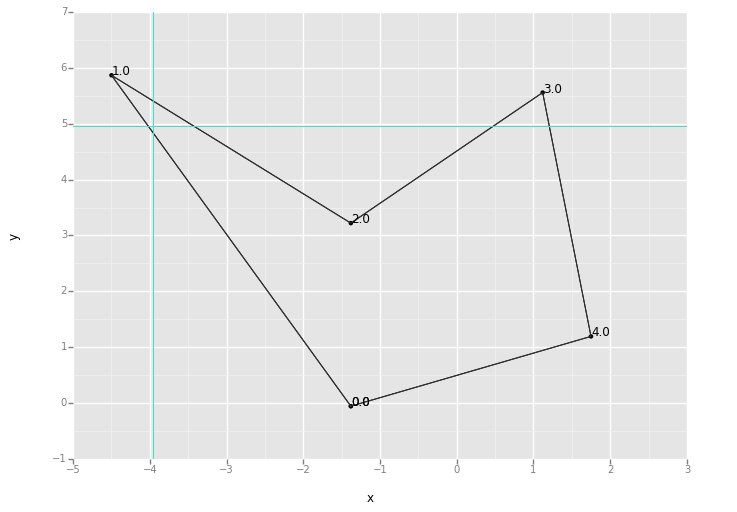

<ggplot: (-9223372036562639623)>

In [132]:
vs.plotPolygon(p) + vs.plotPoint((x,y,z))

In [61]:
# If endpoints of edge are above and bel
# Ax + By + C = 0
# (y0-y1)x + (x1-x0)y + x0y1 - x1y0 = 0 (Given)
# equation of edge 01
A = p[0][1]-p[1][1]
B = p[1][0]-p[0][0]
C = p[0][0]*p[1][1] - p[1][0]*p[0][1]
xc = (-B * 4.96 - C)/A
xc

-4.0212141652613829

In [62]:
xc > x

False

In [63]:
xc = gf.xIntersect(p[1], p[2], y)
xc

-3.4261798002219757

In [64]:
xc > x

True

In [29]:
# End polygon intersection question

In [32]:
# Barycentric coordinates question (3)
t = np.array(((-0.47, 5.71, -6.23),
            (-2.33, 3.11, -5.49),
            (-3.63, 1.63, -4.74)))
e = np.array((-4.52, 2.35, 1.31))
d = np.array((-0.51, 0.85, -0.17))

In [37]:
# What are the beta and gamma barycentric coordinates and the t distance along the ray of the intersection between R and the plane defined by T?
n = gf.normalize(np.cross(t[1]-t[0], t[2]-t[1]))
tp = (t[0]-e).dot(n)/d.dot(n)
print("t: %.2f" % tp)

t: 2.99


In [39]:
px = e + tp*d
px

array([-6.04449016,  4.89081694,  0.80183661])

In [44]:
# (y0-y1)x + (x1-x0)y + x0y1 - x1y0 -- Given 
c, f01 = gf.lineEq(t[0], t[1])
gamma = f01(px)/f01(t[2])
c, f02 = gf.lineEq(t[0], t[2])
beta = f02(px)/f02(t[1])
(beta, gamma)

(-32.135365717059571, 20.67919949221513)

In [45]:
# Is the intersection point inside the triangle?
beta > 0 and gamma > 0 and 1-beta-gamma > 0

False

In [47]:
# Is the intersection point in front of the viewpoint e?
tp > 0

True

In [48]:
# End barycentric question

In [54]:
# Ray casting question (perspective) (12)
i, j = 4, 4
nx, ny = 386, 706
l, r, b, t = 1, 3, -1, 0
e = np.array((3, 1, -2))
ux = np.array((-0.44, -0.22, 0.87))
vx = np.array((-0.58, -0.58, 0.58))
wx = np.array((-0.85, -0.17, -0.51))

In [55]:
u = l + (r-l) * (i+0.5)/nx
v = b + (t-b) * (j+0.5)/ny
u, v

(1.0233160621761659, -0.9936260623229461)

In [52]:
origin = e
origin

array([ 3,  1, -2])

In [57]:
ip = 3       # error: not given in question

In [59]:
d = ip*-wx + u*ux + v*vx 
d

array([ 2.67604405,  0.86117358,  1.84398186])